In [42]:
import tensorflow as tf
tf.__version__

'2.5.0'

In [43]:
import pandas as pd
import numpy as np
import seaborn as sns

In [44]:
from glob import glob
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm
import os
import cv2

In [45]:
import numpy as np
import cv2
from glob import glob
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from patchify import patchify

In [46]:
hp = {}
hp["image_size"] = 200
hp["patch_size"] = 25
hp["num_patches"] = (hp["image_size"]**2) // (hp["patch_size"]**2)
hp["num_classes"] = 5
hp["num_channels"] = 3

hp["flat_patches_shape"] = (hp["num_patches"], hp["patch_size"]*hp["patch_size"]*hp["num_channels"])

hp["batch_size"] = 32
hp["num_classes"] = 5
hp["class_names"] = ["daisy", "dandelion", "rose", "sunflower", "tulip"]

In [47]:
root_path = 'Dataset/flowers/'

In [48]:
class_name = [cls for cls in os.listdir(root_path)]
class_name

['daisy', 'dandelion', 'rose', 'sunflower', 'tulip']

In [49]:
Img_dict = {}
for cls in class_name:
    for img in glob(os.path.join(os.path.join(root_path,cls), "*.jpg")):
        Img_dict[img] = cls

In [50]:
df = pd.DataFrame.from_dict(Img_dict.items())
df.columns = ['Image_Path','Class_Name']
# df

C:\Users\Asus\anaconda3\envs\torch2tf2\lib\site-packages\ipykernel_launcher.py:12: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  if sys.path[0] == "":


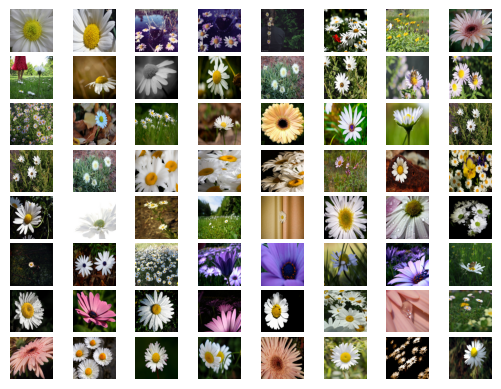

In [51]:
fig, axe = plt.subplots(nrows=8, ncols=8,gridspec_kw={'wspace': 0.1,'hspace':0.1})
ax = axe.ravel()

for i in range(64):
    image = cv2.imread(df['Image_Path'].iloc[i])
    image = cv2.resize(image, (224,224))
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert image from BGR to RGB
    ax[i].imshow(image_rgb)
    ax[i].axis('off')


plt.tight_layout()
plt.show()

In [52]:
def load_data(path, split=0.1):
    images = shuffle(glob(os.path.join(path, "*", "*.jpg")))

    split_size = int(len(images) * split)
    train_x, valid_x = train_test_split(images, test_size=split_size, random_state=42)
    train_x, test_x = train_test_split(train_x, test_size=split_size, random_state=42)

    return train_x, valid_x, test_x

In [84]:
def ReturnClassCount(data):
    class_count = {'dandelion':0, 'daisy':0, 'sunflower':0, 'tulip':0, 'rose':0}
    for ind in range(0,len(data)):
        class_count[data[ind].split("\\")[1]] += 1
    return class_count

In [85]:
ReturnClassCount(train_x)

{'dandelion': 828, 'daisy': 618, 'sunflower': 593, 'tulip': 790, 'rose': 626}

In [86]:
ReturnClassCount(test_x)

{'dandelion': 108, 'daisy': 68, 'sunflower': 80, 'tulip': 89, 'rose': 86}

In [87]:
ReturnClassCount(valid_x)

{'dandelion': 116, 'daisy': 78, 'sunflower': 60, 'tulip': 105, 'rose': 72}